#### CSE 9099o Final Hackathon Batch 81 A _Robust Yield Prediction

**Name :** Sai Vivek Kanukuntla    **Enrollment_Id :** 3679 

# Data Cleaning and Preprocessing -

### Import all the required libraries

In [1]:
#Necessary Imports
import os
import pandas as pd
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Set the Working Directory

In [2]:
os.chdir('/home/datasets/lab/CSE9099_FinalHack')

In [3]:
os.listdir('/home/datasets/lab/CSE9099_FinalHack')

['train_data_withtarget.csv',
 'test_weather.csv',
 'train_weather.csv',
 'traindata_without_target.csv',
 'sample_submission.csv',
 'test_data.csv',
 'farm_data.csv']

Reading the Datasets from the given path

In [4]:
train_data = pd.read_csv('train_data_withtarget.csv')
train_weather = pd.read_csv('train_weather.csv')
farm_data = pd.read_csv('farm_data.csv')

In [5]:
train_data.dtypes

date                object
farm_id             object
ingredient_type     object
yield              float64
dtype: object

In [6]:
train_data.nunique()

date                  8784
farm_id               1434
ingredient_type          4
yield              1688175
dtype: int64

In [7]:
train_data.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [8]:
train_data.tail()

,date,farm_id,ingredient_type,yield
20216095,2016-12-31 23:00:00,fid_41664,ing_w,8.750
20216096,2016-12-31 23:00:00,fid_14529,ing_w,4.825
20216097,2016-12-31 23:00:00,fid_46454,ing_w,0.000
20216098,2016-12-31 23:00:00,fid_24103,ing_w,159.575
20216099,2016-12-31 23:00:00,fid_34139,ing_w,2.850


In [9]:
farm_data.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [10]:
farm_data.dtypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

In [11]:
train_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [12]:
train_weather.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

Visualizations with the Target Variable

In [13]:
sns.set_style("whitegrid")
sns.set_context("poster")

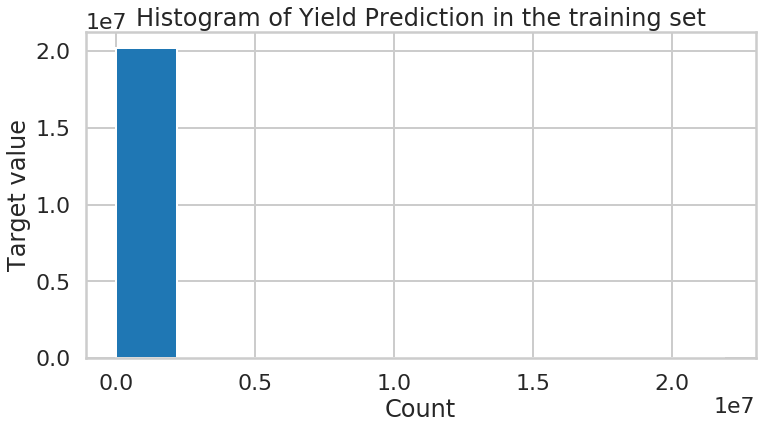

In [14]:
plt.figure(figsize = (12, 6))
plt.hist(train_data['yield'])
plt.title('Histogram of Yield Prediction in the training set')
plt.xlabel('Count')
plt.ylabel('Target value')
plt.show()

### Data Cleansing

Train Data - 

In [15]:
#Convert date Object to datetime format
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')

In [16]:
#Type Conversion
train_data['farm_id'] = train_data['farm_id'].astype('str')

In [17]:
#Check for duplicates
train_data.duplicated(subset=None, keep= 'first').sum()

117

In [18]:
#Drop duplicates
train_data1 = train_data.drop_duplicates(subset=None, keep= 'first', inplace=False, ignore_index=False)

Farm Data - 

In [19]:
#Drop 'operations_commencing_year' column from the farm data
farm_data.drop('operations_commencing_year', axis=1, inplace=True)

In [20]:
#Type Casting
farm_data['farm_id'] = farm_data['farm_id'].astype('str')

In [21]:
#Check for Null Values
farm_data.isnull().sum()

farm_id                     0
num_processing_plants    1094
farm_area                   0
farming_company             0
deidentified_location       0
dtype: int64

In [22]:
#Fill missing values with median 
farm_data['num_processing_plants'].fillna(farm_data['num_processing_plants'].median(), inplace=True)


In [23]:
#Type Conversion
farm_data['num_processing_plants'] = farm_data['num_processing_plants'].astype('int64')

Weather Data -

In [24]:
#Convert date Object to datetime format
train_weather['timestamp'] = pd.to_datetime(train_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [25]:
#Dropping 'cloudiness' column
train_weather.drop('cloudiness', axis = 1, inplace =  True)

### Merging the Datasets

In [26]:
#Merging train_data and farm_data on 'farm_id' column
train_data_merged = pd.merge(train_data1,farm_data, on = 'farm_id')

In [27]:
train_data_merged.head()

,date,farm_id,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369


In [28]:
#Renaming date column as timestamp
train_data_merged.rename(columns = {'date':'timestamp'},inplace = True)

In [29]:
#Check for Value counts
train_weather.deidentified_location.value_counts()

location 7369    8784
location 5677    8784
location 2532    8783
location 5833    8783
location 5489    8783
location 1784    8782
location 565     8782
location 8421    8780
location 5290    8780
location 5410    8777
location 959     8763
location 7048    8755
location 6364    8755
location 868     8614
location 4525    8614
location 5150    8454
Name: deidentified_location, dtype: int64

In [30]:
#Drop deidentified_location column from the merged dataset
train_data_merged.drop('deidentified_location', axis=1, inplace=True)

In [31]:
train_data_merged.shape

(20602665, 7)

In [32]:
train_weather.shape

(139773, 8)

In [33]:
train_data_merged.isnull().sum()

timestamp                0
farm_id                  0
ingredient_type          0
yield                    0
num_processing_plants    0
farm_area                0
farming_company          0
dtype: int64

In [34]:
train_data_merged.nunique()

timestamp                   8784
farm_id                     1434
ingredient_type                4
yield                    1688175
num_processing_plants         18
farm_area                   1397
farming_company               16
dtype: int64

In [35]:
train_data_merged.ingredient_type.value_counts(normalize = True)*100

ing_w    59.769447
ing_x    20.659056
ing_y    13.308405
ing_z     6.263093
Name: ingredient_type, dtype: float64

In [36]:
train_data_merged.farming_company.value_counts(normalize = True)*100

Obery Farms                            40.450131
Wayne Farms                            21.702649
Sanderson Farms                        11.029656
Dole Food Company                      10.588548
Del Monte Foods                         8.382649
Foster Farms                            2.061529
Other                                   1.175683
Freight Farms                           1.037710
Monogram Foods                          0.610178
Perdue Farms                            0.553763
Tyson Foods                             0.546808
Mountaire Farms                         0.542944
Northland Organic Foods Corporation     0.468478
West Liberty Foods                      0.376781
Kansas Ville Farms                      0.272795
Southern Confederate Farms              0.199697
Name: farming_company, dtype: float64

In [37]:
train_weather.nunique()

timestamp                8784
deidentified_location      16
temp_obs                  619
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
dtype: int64

In [38]:
train_weather.head()

,timestamp,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,250.0,20.0,1020.0,-1.0,2.6


In [39]:
train_weather.dtypes

timestamp                datetime64[ns]
deidentified_location            object
temp_obs                        float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
dtype: object

In [40]:
#Drop 'timestamp' from weather data
train_weather.drop('timestamp', axis=1, inplace=True)

In [41]:
train_weather.shape

(139773, 7)

In [42]:
train_data_merged.shape

(20602665, 7)

In [43]:
#Final Merged Dataset 
train_final_merged = pd.merge(train_data_merged,train_weather,left_index = True, right_index = True)

In [44]:
train_final_merged.nunique()

timestamp                8784
farm_id                    14
ingredient_type             2
yield                    6456
num_processing_plants       1
farm_area                  14
farming_company             4
deidentified_location      16
temp_obs                  619
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
dtype: int64

In [45]:
train_final_merged.ingredient_type.value_counts(normalize = True)*100

ing_w    86.231962
ing_x    13.768038
Name: ingredient_type, dtype: float64

In [46]:
train_final_merged.farming_company.value_counts(normalize = True)*100

Obery Farms          69.664384
Dole Food Company    12.568951
Wayne Farms          11.482189
Sanderson Farms       6.284476
Name: farming_company, dtype: float64

In [47]:
train_final_merged.deidentified_location.value_counts(normalize = True)*100

location 7369    6.284476
location 5677    6.284476
location 2532    6.283760
location 5833    6.283760
location 5489    6.283760
location 1784    6.283045
location 565     6.283045
location 8421    6.281614
location 5290    6.281614
location 5410    6.279467
location 959     6.269451
location 7048    6.263728
location 6364    6.263728
location 868     6.162850
location 4525    6.162850
location 5150    6.048378
Name: deidentified_location, dtype: float64

In [48]:
train_final_merged.shape

(139773, 14)

In [49]:
train_final_merged.isnull().sum()

timestamp                    0
farm_id                      0
ingredient_type              0
yield                        0
num_processing_plants        0
farm_area                    0
farming_company              0
deidentified_location        0
temp_obs                    55
wind_direction            6268
dew_temp                   113
pressure_sea_level       10618
precipitation            50289
wind_speed                 304
dtype: int64

In [50]:
train_final_merged.head()

,timestamp,farm_id,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,24.4,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,22.8,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,21.1,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,7,690.455096,Obery Farms,location 7369,20.0,250.0,20.0,1020.0,-1.0,2.6


In [51]:
train_final_merged.tail()

,timestamp,farm_id,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
139768,2016-09-20 20:00:00,fid_43573,ing_w,499.293,7,9232.70014,Obery Farms,location 5150,3.0,180.0,-8.0,NaN,NaN,5.7
139769,2016-09-20 21:00:00,fid_43573,ing_w,447.077,7,9232.70014,Obery Farms,location 5150,2.8,180.0,-8.9,1007.4,NaN,7.7
139770,2016-09-20 22:00:00,fid_43573,ing_w,404.417,7,9232.70014,Obery Farms,location 5150,2.8,180.0,-7.2,1007.5,NaN,5.1
139771,2016-09-20 23:00:00,fid_43573,ing_w,359.368,7,9232.70014,Obery Farms,location 5150,2.2,170.0,-6.7,1008.0,NaN,4.6
139772,2016-09-21 00:00:00,fid_43573,ing_w,323.192,7,9232.70014,Obery Farms,location 5150,1.7,180.0,-5.6,1008.5,-1.0,8.8


In [52]:
train_final_merged.drop('farm_id', axis=1, inplace=True)

In [53]:
train_final_merged.head()

,timestamp,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,24.4,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,22.8,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,21.1,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,20.0,250.0,20.0,1020.0,-1.0,2.6


In [54]:
train_final_merged.tail()

,timestamp,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
139768,2016-09-20 20:00:00,ing_w,499.293,7,9232.70014,Obery Farms,location 5150,3.0,180.0,-8.0,NaN,NaN,5.7
139769,2016-09-20 21:00:00,ing_w,447.077,7,9232.70014,Obery Farms,location 5150,2.8,180.0,-8.9,1007.4,NaN,7.7
139770,2016-09-20 22:00:00,ing_w,404.417,7,9232.70014,Obery Farms,location 5150,2.8,180.0,-7.2,1007.5,NaN,5.1
139771,2016-09-20 23:00:00,ing_w,359.368,7,9232.70014,Obery Farms,location 5150,2.2,170.0,-6.7,1008.0,NaN,4.6
139772,2016-09-21 00:00:00,ing_w,323.192,7,9232.70014,Obery Farms,location 5150,1.7,180.0,-5.6,1008.5,-1.0,8.8


In [55]:
#Calculating Hour difference between the timestamps
train_final_merged['Hours'] = train_final_merged['timestamp'].dt.hour

In [56]:
#train_final_merged['Minutes'] = train_final_merged['timestamp'].dt.minute

In [57]:
#train_final_merged['Seconds'] = train_final_merged['timestamp'].dt.second

In [58]:
train_final_merged['timestamp'].min(), train_final_merged['timestamp'].max(), (train_final_merged['timestamp'].max() -train_final_merged['timestamp'].min())

(Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-12-31 23:00:00'),
 Timedelta('365 days 23:00:00'))

Unix time is a system for describing a point in time. It is the number of seconds that have elapsed since the Unix epoch

In [59]:
#Converting Timestamp to integer
train_final_merged['Unix Sec'] = pd.to_datetime(train_final_merged['timestamp']).astype(int)/ 10**9

In [60]:
train_final_merged.head()

,timestamp,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Hours,Unix Sec
0,2016-01-01 00:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,NaN,0.0,0,1.451606e+09
1,2016-01-01 01:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,24.4,70.0,21.1,1020.2,-1.0,1.5,1,1.451610e+09
2,2016-01-01 02:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,22.8,0.0,21.1,1020.2,0.0,0.0,2,1.451614e+09
3,2016-01-01 03:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,21.1,0.0,20.6,1020.1,0.0,0.0,3,1.451617e+09
4,2016-01-01 04:00:00,ing_w,0.0,7,690.455096,Obery Farms,location 7369,20.0,250.0,20.0,1020.0,-1.0,2.6,4,1.451621e+09


In [61]:
train_final_merged.dtypes

timestamp                datetime64[ns]
ingredient_type                  object
yield                           float64
num_processing_plants             int64
farm_area                       float64
farming_company                  object
deidentified_location            object
temp_obs                        float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
Hours                             int64
Unix Sec                        float64
dtype: object

In [62]:
#Type Conversion float to int
train_final_merged['Unix Sec'] = train_final_merged['Unix Sec'].astype('int64')

In [63]:
train_final_merged.dtypes

timestamp                datetime64[ns]
ingredient_type                  object
yield                           float64
num_processing_plants             int64
farm_area                       float64
farming_company                  object
deidentified_location            object
temp_obs                        float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
Hours                             int64
Unix Sec                          int64
dtype: object

In [64]:
train_final_merged.drop('timestamp', axis=1, inplace=True)

###  Practices in  Data Cleaning -

* I have cleaned the data by checking for duplicate values and dropped them from that trainset.

* Performed Type casting on the columns respectively wherever needed and also checked for misssing values in the data.


* Determined if all of the columns in test exist in train, and vice versa w.r.t target, 
Did some initial plotting .

* Merged all the three datasets into the final training set which is given to the model to learn and can predict on much larger data.

* To save complexity , removed/dropped few columns from the data .

### Label Encoding for Categorical Columns

In [65]:
#Necessary Import
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
train_final_merged.farming_company = le.fit_transform(train_final_merged.farming_company)

In [68]:
train_final_merged['farming_company'] = train_final_merged['farming_company'].astype('category')

In [69]:
train_final_merged.deidentified_location = le.fit_transform(train_final_merged.deidentified_location)

In [70]:
train_final_merged['deidentified_location'] = train_final_merged['deidentified_location'].astype('category')

In [71]:
train_final_merged.ingredient_type = le.fit_transform(train_final_merged.ingredient_type)

In [72]:
train_final_merged['ingredient_type'] = train_final_merged['ingredient_type'].astype('category')

In [73]:
train_final_merged.dtypes

ingredient_type          category
yield                     float64
num_processing_plants       int64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
Hours                       int64
Unix Sec                    int64
dtype: object

In [74]:
train_final_merged.nunique()

ingredient_type             2
yield                    6456
num_processing_plants       1
farm_area                  14
farming_company             4
deidentified_location      16
temp_obs                  619
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
Hours                      24
Unix Sec                 8784
dtype: int64

In [75]:
train_final_merged.farming_company.value_counts()

1    97372
0    17568
3    16049
2     8784
Name: farming_company, dtype: int64

In [76]:
train_final_merged.head()

,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Hours,Unix Sec
0,0,0.0,7,690.455096,1,12,25.0,0.0,20.0,1019.7,NaN,0.0,0,1451606400
1,0,0.0,7,690.455096,1,12,24.4,70.0,21.1,1020.2,-1.0,1.5,1,1451610000
2,0,0.0,7,690.455096,1,12,22.8,0.0,21.1,1020.2,0.0,0.0,2,1451613600
3,0,0.0,7,690.455096,1,12,21.1,0.0,20.6,1020.1,0.0,0.0,3,1451617200
4,0,0.0,7,690.455096,1,12,20.0,250.0,20.0,1020.0,-1.0,2.6,4,1451620800


In [77]:
train_final_merged.deidentified_location.value_counts()

12    8784
8     8784
9     8783
6     8783
1     8783
7     8782
0     8782
13    8780
4     8780
5     8777
15    8763
11    8755
10    8755
14    8614
2     8614
3     8454
Name: deidentified_location, dtype: int64

In [78]:
train_final_merged.ingredient_type.value_counts()

0    120529
1     19244
Name: ingredient_type, dtype: int64

In [79]:
train_final_merged.nunique()

ingredient_type             2
yield                    6456
num_processing_plants       1
farm_area                  14
farming_company             4
deidentified_location      16
temp_obs                  619
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
Hours                      24
Unix Sec                 8784
dtype: int64

In [80]:
#Descriptive Stats of Final Dataset
train_final_merged.describe()

,yield,num_processing_plants,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Hours,Unix Sec
count,139773.000000,139773.0,139773.000000,139718.000000,133505.000000,139660.000000,129155.000000,89484.000000,139469.000000,139773.000000,1.397730e+05
mean,503.861098,7.0,6451.949394,14.418106,180.526632,7.350158,1016.158038,0.983047,3.560527,11.502615,1.467400e+09
std,981.401152,0.0,8196.029748,10.626595,111.523629,9.790235,7.629684,8.463678,2.335874,6.921604,8.867605e+06
min,0.000000,7.0,252.696160,-28.900000,0.000000,-35.000000,968.200000,-1.000000,0.000000,0.000000,1.451606e+09
25%,0.000000,7.0,743.224000,7.200000,80.000000,0.600000,1011.800000,0.000000,2.100000,6.000000,1.459908e+09
50%,114.670000,7.0,3446.701300,15.000000,190.000000,8.300000,1016.400000,0.000000,3.100000,12.000000,1.467310e+09
75%,478.475000,7.0,9232.700140,22.200000,280.000000,14.400000,1020.800000,0.000000,5.000000,18.000000,1.474798e+09
max,8442.070000,7.0,34445.924019,47.200000,360.000000,26.100000,1045.500000,343.000000,19.000000,23.000000,1.483225e+09


In [81]:
#Check for null values in the merged dataset
train_final_merged.isnull().sum()

ingredient_type              0
yield                        0
num_processing_plants        0
farm_area                    0
farming_company              0
deidentified_location        0
temp_obs                    55
wind_direction            6268
dew_temp                   113
pressure_sea_level       10618
precipitation            50289
wind_speed                 304
Hours                        0
Unix Sec                     0
dtype: int64

In [82]:
train_final_merged.dtypes

ingredient_type          category
yield                     float64
num_processing_plants       int64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
Hours                       int64
Unix Sec                    int64
dtype: object

In [83]:
train_final_merged.drop('Hours', axis=1, inplace=True)

In [84]:
train_final_merged.num_processing_plants.value_counts()

7    139773
Name: num_processing_plants, dtype: int64

In [85]:
train_final_merged.head()

,ingredient_type,yield,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0,0.0,7,690.455096,1,12,25.0,0.0,20.0,1019.7,NaN,0.0,1451606400
1,0,0.0,7,690.455096,1,12,24.4,70.0,21.1,1020.2,-1.0,1.5,1451610000
2,0,0.0,7,690.455096,1,12,22.8,0.0,21.1,1020.2,0.0,0.0,1451613600
3,0,0.0,7,690.455096,1,12,21.1,0.0,20.6,1020.1,0.0,0.0,1451617200
4,0,0.0,7,690.455096,1,12,20.0,250.0,20.0,1020.0,-1.0,2.6,1451620800


In [86]:
#Seperated the numeric columns from the final merged dataset
num_col = ['yield','farm_area','temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level', 
       'precipitation', 'wind_speed','Unix Sec']

In [87]:
num_col

['yield',
 'farm_area',
 'temp_obs',
 'wind_direction',
 'dew_temp',
 'pressure_sea_level',
 'precipitation',
 'wind_speed',
 'Unix Sec']

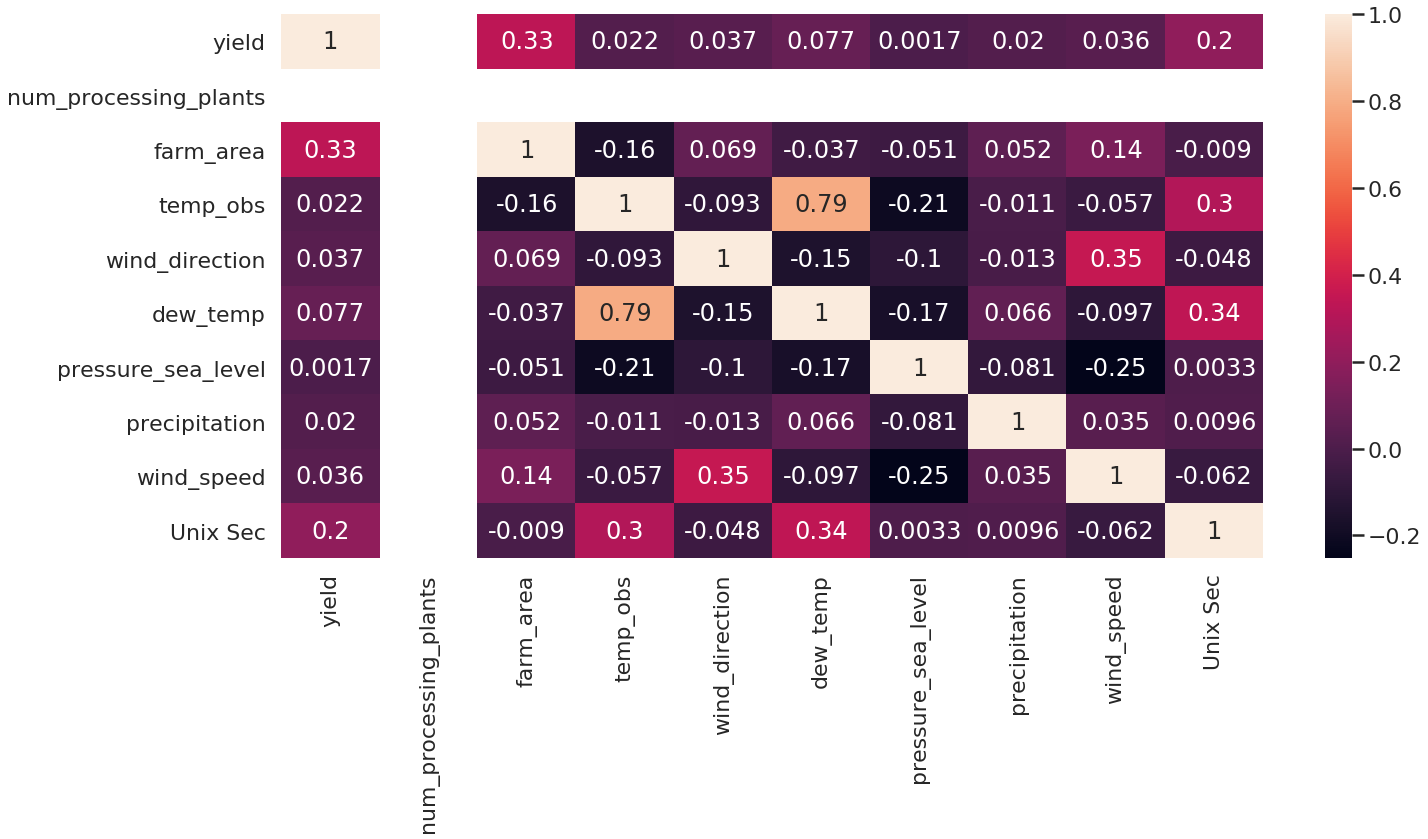

In [89]:
#Correlation Plot on the numeric data
plt.figure(figsize=(22,10))
data = train_final_merged

df = pd.DataFrame(data)

corrMatrix = df.corr(method = 'pearson',min_periods = 1)
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Imputing the Numeric Columns

In [90]:
from sklearn.impute import SimpleImputer

In [91]:
#Imputation
num_imputer = SimpleImputer(strategy = 'median')

imputed_data = pd.DataFrame(num_imputer.fit_transform(train_final_merged[num_col]),
                               columns = num_col)

In [92]:
imputed_data.dtypes

yield                 float64
farm_area             float64
temp_obs              float64
wind_direction        float64
dew_temp              float64
pressure_sea_level    float64
precipitation         float64
wind_speed            float64
Unix Sec              float64
dtype: object

In [93]:
imputed_data.head()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0.0,690.455096,25.0,0.0,20.0,1019.7,0.0,0.0,1.451606e+09
1,0.0,690.455096,24.4,70.0,21.1,1020.2,-1.0,1.5,1.451610e+09
2,0.0,690.455096,22.8,0.0,21.1,1020.2,0.0,0.0,1.451614e+09
3,0.0,690.455096,21.1,0.0,20.6,1020.1,0.0,0.0,1.451617e+09
4,0.0,690.455096,20.0,250.0,20.0,1020.0,-1.0,2.6,1.451621e+09


In [94]:
imputed_data.tail()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
139768,499.293,9232.70014,3.0,180.0,-8.0,1016.4,0.0,5.7,1.474402e+09
139769,447.077,9232.70014,2.8,180.0,-8.9,1007.4,0.0,7.7,1.474405e+09
139770,404.417,9232.70014,2.8,180.0,-7.2,1007.5,0.0,5.1,1.474409e+09
139771,359.368,9232.70014,2.2,170.0,-6.7,1008.0,0.0,4.6,1.474412e+09
139772,323.192,9232.70014,1.7,180.0,-5.6,1008.5,-1.0,8.8,1.474416e+09


In [95]:
#Type Conversions
col = ['temp_obs','dew_temp','wind_speed','wind_direction','Unix Sec','farm_area']

imputed_data[col] = imputed_data[col].astype('int64')

In [96]:
imputed_data.head()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0.0,690,25,0,20,1019.7,0.0,0,1451606400
1,0.0,690,24,70,21,1020.2,-1.0,1,1451610000
2,0.0,690,22,0,21,1020.2,0.0,0,1451613600
3,0.0,690,21,0,20,1020.1,0.0,0,1451617200
4,0.0,690,20,250,20,1020.0,-1.0,2,1451620800


In [97]:
imputed_data.tail()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
139768,499.293,9232,3,180,-8,1016.4,0.0,5,1474401600
139769,447.077,9232,2,180,-8,1007.4,0.0,7,1474405200
139770,404.417,9232,2,180,-7,1007.5,0.0,5,1474408800
139771,359.368,9232,2,170,-6,1008.0,0.0,4,1474412400
139772,323.192,9232,1,180,-5,1008.5,-1.0,8,1474416000


In [98]:
imputed_data.dtypes

yield                 float64
farm_area               int64
temp_obs                int64
wind_direction          int64
dew_temp                int64
pressure_sea_level    float64
precipitation         float64
wind_speed              int64
Unix Sec                int64
dtype: object

In [99]:
imputed_data.shape

(139773, 9)

In [100]:
imputed_data.insert(0, 'id', imputed_data.index)

In [101]:
imputed_data.head()

,id,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0,0.0,690,25,0,20,1019.7,0.0,0,1451606400
1,1,0.0,690,24,70,21,1020.2,-1.0,1,1451610000
2,2,0.0,690,22,0,21,1020.2,0.0,0,1451613600
3,3,0.0,690,21,0,20,1020.1,0.0,0,1451617200
4,4,0.0,690,20,250,20,1020.0,-1.0,2,1451620800


In [102]:
cat_col = ['ingredient_type','farming_company', 'deidentified_location']

In [103]:
Final_data = pd.merge(imputed_data,
                         train_final_merged[cat_col],
                         left_index=True,
                         right_index=True)

In [104]:
Final_data.head()

,id,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec,ingredient_type,farming_company,deidentified_location
0,0,0.0,690,25,0,20,1019.7,0.0,0,1451606400,0,1,12
1,1,0.0,690,24,70,21,1020.2,-1.0,1,1451610000,0,1,12
2,2,0.0,690,22,0,21,1020.2,0.0,0,1451613600,0,1,12
3,3,0.0,690,21,0,20,1020.1,0.0,0,1451617200,0,1,12
4,4,0.0,690,20,250,20,1020.0,-1.0,2,1451620800,0,1,12


In [105]:
Final_data.dtypes

id                          int64
yield                     float64
farm_area                   int64
temp_obs                    int64
wind_direction              int64
dew_temp                    int64
pressure_sea_level        float64
precipitation             float64
wind_speed                  int64
Unix Sec                    int64
ingredient_type          category
farming_company          category
deidentified_location    category
dtype: object

# Model Building and Predictions

###  Train Test Validation Split

In [106]:
#Necessary Import
from sklearn.model_selection import train_test_split

In [107]:
y = Final_data['yield']
X = Final_data.loc[:, Final_data.columns != 'yield']

X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.20,random_state = 123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(111818, 12) (27955, 12)
(111818,) (27955,)


### Building a Base Model

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

* Because we are attempting to predict a value we will look at Regression methods. Because of the medium size of our data we will begin RandomForestRegressors,
and then move towards ensemble methods like boosted trees such as GradientBoostingRegressor.



* To give ourself a baseline our first submission will simply use all the data and no hyperparameter tuning.

In [109]:
# First create the base model to tune
rf = RandomForestRegressor()

In [110]:
rf.fit(X_train, y_train)


RandomForestRegressor()

In [111]:
train_pred1 = rf.predict(X_train)
test_pred1 = rf.predict(X_test)


In [112]:
train_pred1

array([395.85771,  98.41559,   0.     , ...,   0.     ,   0.     ,
       139.11096])

In [113]:
test_pred1

array([  0.      , 298.32675 , 409.43725 , ...,  16.999835,   1.160352,
         0.      ])

In [114]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))


0.9856948315532165
0.8962162167393667


In [115]:
#Defining Custom Function 
def convert_for_sklearn(label_list):
    return [1 if i == 1 else 0 for i in label_list]


def rmse_metric(y_true, y_pred):
    
    y_test_scoring = convert_for_sklearn(y_true)
    test_pred_scoring = convert_for_sklearn(y_pred)

    mse = mean_squared_error(y_true= y_test, y_pred = test_pred1)
    rmse = np.sqrt(mse)
    
    print("Test RMSE_score: ",rmse)

In [116]:
rmse_metric(y_true = y_test, y_pred = test_pred1)

Test RMSE_score:  310.32330939137864


### Hyper Parameter Tuning and Cross Validation

* Hyperparameter tuning on the all features data .

In [117]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


* Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It is similar to grid search, and yet it has proven to yield better results comparatively.

In [118]:
#import randomized search
from sklearn.model_selection import RandomizedSearchCV


In [119]:
#Use the random grid to search for best hyperparameters


# Number of trees in random forest
n_estimators = [100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15,20,25,30]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [120]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [121]:
pprint(random_grid)

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [100, 150, 200]}


In [122]:
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [123]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=  22.7s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.7s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=  22.4s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=  22.7s
[CV] n_estimators=150, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=150, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=  27.6s
[CV] n_estimators=150, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=150, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=  27.2s
[CV] n_estimators=150, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=150, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=10, total=  28.0s
[CV] n_estimators=150, min_samples_split

KeyboardInterrupt: 

In [125]:
#rf_random.best_params_

### Hyperparameter Tuned Random Forest Regressor

* Best parameters set for the Random Forest Regression. 

In [126]:
RF_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,          
                               min_samples_leaf=2, min_samples_split=5,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [127]:
%%time
RF_reg.fit(X_train,y_train)

CPU times: user 25.3 s, sys: 284 ms, total: 25.6 s
Wall time: 25.6 s


RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, n_jobs=1)

In [128]:
train_pred = RF_reg.predict(X_train)
test_pred = RF_reg.predict(X_test)


In [129]:
train_pred

array([3.91203474e+02, 9.57916015e+01, 0.00000000e+00, ...,
       2.25243750e-02, 1.15153750e+00, 1.36395602e+02])

In [130]:
test_pred

array([1.70641667e-03, 2.94891387e+02, 3.88998779e+02, ...,
       1.75672962e+01, 1.87047849e+00, 3.16434400e-01])

In [131]:
print(RF_reg.score(X_train, y_train))
print(RF_reg.score(X_test, y_test))


0.9562703995445271
0.8723426911529972


In [132]:
#Defining Custom Function 
def convert_for_sklearn(label_list):
    return [1 if i == 1 else 0 for i in label_list]


def rmse_metric(y_true, y_pred):
    
    y_test_scoring = convert_for_sklearn(y_true)
    test_pred_scoring = convert_for_sklearn(y_pred)

    mse = mean_squared_error(y_true= y_test, y_pred = test_pred)
    rmse = np.sqrt(mse)
    
    print("Test RMSE_score: ",rmse)

In [133]:
rmse_metric(y_true = y_test, y_pred = test_pred)

Test RMSE_score:  344.1695875856751


### Gradient Boosting Regressor

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators= 400,
                                 learning_rate=0.1,
                                 max_depth = 5,
                                min_samples_split = 2,
                                 random_state=0,
                                 warm_start = True)

In [135]:
%%time 
gbm_base_model = gbm.fit(X_train,y_train)

CPU times: user 1min 36s, sys: 315 ms, total: 1min 36s
Wall time: 1min 36s


In [136]:
train_pred2 = gbm.predict(X_train)
test_pred2 = gbm.predict(X_test)


In [137]:
train_pred2

array([422.1496657 , 103.67534629,  -1.66623057, ...,  -1.56107355,
        16.04138555, 133.5744567 ])

In [138]:
test_pred2

array([ -7.22866943, 331.20035933, 348.45012131, ...,  34.50790149,
         4.92207188,   7.9871877 ])

In [139]:
print(gbm.score(X_train, y_train))
print(gbm.score(X_test, y_test))


0.8814756541117789
0.842737014557192


In [140]:
# Evaluation of Random Search
def evaluate(gbm, X_test, y_test):
    predictions = gbm.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, test_pred2))
    print('Model Performance')
    print('RMSE of: ', errors)
    
    return errors

In [141]:
base_accuracy = evaluate(gbm, X_test, y_test)

Model Performance
RMSE of:  381.9995989840124


# Predictions on the Test Data

Reading the Test Data Files

In [145]:
# Reading the test data files
test_weather = pd.read_csv('test_weather.csv')
test_data = pd.read_csv('test_data.csv')

In [146]:
test_data.head()

,date,farm_id,ingredient_type,id
0,2017-01-01 00:00:00,fid_110884,ing_w,0
1,2017-01-01 00:00:00,fid_90053,ing_w,1
2,2017-01-01 00:00:00,fid_17537,ing_w,2
3,2017-01-01 00:00:00,fid_110392,ing_w,3
4,2017-01-01 00:00:00,fid_62402,ing_w,4


In [147]:
test_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01 00:00:00,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
1,2017-01-01 01:00:00,location 7369,17.8,2.0,130.0,12.8,1022.0,0.0,3.1
2,2017-01-01 02:00:00,location 7369,16.1,0.0,140.0,12.8,1021.9,0.0,3.1
3,2017-01-01 03:00:00,location 7369,17.2,0.0,140.0,13.3,1022.2,0.0,3.1
4,2017-01-01 04:00:00,location 7369,16.7,2.0,130.0,13.3,1022.3,0.0,2.6


In [148]:
test_data.shape

(20848800, 4)

* Performed all the Data Cleaning practices on the Test datasets as well 

In [149]:
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')

In [150]:
test_data['farm_id'] = test_data['farm_id'].astype('str')

In [151]:
#test_data.duplicated(subset=None, keep= 'first').sum()

In [152]:
#test_data1 = test_data.drop_duplicates(subset=None, keep= 'first', inplace=False, ignore_index=False)

In [153]:
test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [154]:
test_weather.drop('cloudiness', axis = 1, inplace =  True)

In [155]:
test_data_merged = pd.merge(test_data,farm_data, on = 'farm_id')

In [156]:
test_data_merged.head()

,date,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
0,2017-01-01 00:00:00,fid_110884,ing_w,0,7,690.455096,Obery Farms,location 7369
1,2017-01-01 01:00:00,fid_110884,ing_w,129,7,690.455096,Obery Farms,location 7369
2,2017-01-01 02:00:00,fid_110884,ing_w,258,7,690.455096,Obery Farms,location 7369
3,2017-01-01 03:00:00,fid_110884,ing_w,387,7,690.455096,Obery Farms,location 7369
4,2017-01-01 04:00:00,fid_110884,ing_w,516,7,690.455096,Obery Farms,location 7369


In [157]:
test_data_merged.rename(columns = {'date':'timestamp'},inplace = True)

In [158]:
#test_data_merged.drop('timestamp', axis=1, inplace=True)

In [159]:
#test_data_merged.drop('deidentified_location', axis=1, inplace=True)

In [160]:
test_weather.drop('timestamp', axis=1, inplace=True)

In [161]:
test_weather.drop('deidentified_location', axis=1, inplace=True)

In [162]:
#test_data.head()

In [163]:
test_data_merged.shape

(21251760, 8)

In [164]:
test_weather.head()

,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,17.8,100.0,11.7,1021.4,NaN,3.6
1,17.8,130.0,12.8,1022.0,0.0,3.1
2,16.1,140.0,12.8,1021.9,0.0,3.1
3,17.2,140.0,13.3,1022.2,0.0,3.1
4,16.7,130.0,13.3,1022.3,0.0,2.6


In [165]:
test_data_merged.tail()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
21251755,2017-12-28 07:00:00,fid_34139,ing_w,41673195,7,8572.252713,Wayne Farms,location 5150
21251756,2017-12-28 08:00:00,fid_34139,ing_w,41673445,7,8572.252713,Wayne Farms,location 5150
21251757,2017-12-28 09:00:00,fid_34139,ing_w,41673695,7,8572.252713,Wayne Farms,location 5150
21251758,2017-12-28 10:00:00,fid_34139,ing_w,41673945,7,8572.252713,Wayne Farms,location 5150
21251759,2017-12-28 11:00:00,fid_34139,ing_w,41674195,7,8572.252713,Wayne Farms,location 5150


In [166]:
test_data_merged.head()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
0,2017-01-01 00:00:00,fid_110884,ing_w,0,7,690.455096,Obery Farms,location 7369
1,2017-01-01 01:00:00,fid_110884,ing_w,129,7,690.455096,Obery Farms,location 7369
2,2017-01-01 02:00:00,fid_110884,ing_w,258,7,690.455096,Obery Farms,location 7369
3,2017-01-01 03:00:00,fid_110884,ing_w,387,7,690.455096,Obery Farms,location 7369
4,2017-01-01 04:00:00,fid_110884,ing_w,516,7,690.455096,Obery Farms,location 7369


In [167]:
#test_data_merged.nunique()

In [168]:
#test_weather.nunique()

In [169]:
test_weather.insert(0, 'id', test_weather.index)

In [170]:
test_weather.head()

,id,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,0,17.8,100.0,11.7,1021.4,NaN,3.6
1,1,17.8,130.0,12.8,1022.0,0.0,3.1
2,2,16.1,140.0,12.8,1021.9,0.0,3.1
3,3,17.2,140.0,13.3,1022.2,0.0,3.1
4,4,16.7,130.0,13.3,1022.3,0.0,2.6


In [171]:
test_data_merged.head()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
0,2017-01-01 00:00:00,fid_110884,ing_w,0,7,690.455096,Obery Farms,location 7369
1,2017-01-01 01:00:00,fid_110884,ing_w,129,7,690.455096,Obery Farms,location 7369
2,2017-01-01 02:00:00,fid_110884,ing_w,258,7,690.455096,Obery Farms,location 7369
3,2017-01-01 03:00:00,fid_110884,ing_w,387,7,690.455096,Obery Farms,location 7369
4,2017-01-01 04:00:00,fid_110884,ing_w,516,7,690.455096,Obery Farms,location 7369


In [172]:
test_data_merged.tail()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location
21251755,2017-12-28 07:00:00,fid_34139,ing_w,41673195,7,8572.252713,Wayne Farms,location 5150
21251756,2017-12-28 08:00:00,fid_34139,ing_w,41673445,7,8572.252713,Wayne Farms,location 5150
21251757,2017-12-28 09:00:00,fid_34139,ing_w,41673695,7,8572.252713,Wayne Farms,location 5150
21251758,2017-12-28 10:00:00,fid_34139,ing_w,41673945,7,8572.252713,Wayne Farms,location 5150
21251759,2017-12-28 11:00:00,fid_34139,ing_w,41674195,7,8572.252713,Wayne Farms,location 5150


In [173]:
#test_weather.drop('deidentified_location', axis=1, inplace=True)

In [174]:
test_data_merged.shape

(21251760, 8)

In [175]:
test_weather.shape

(138825, 7)

In [176]:
test_final_merge = pd.merge(test_data_merged,test_weather,on = 'id',how = 'left')

In [177]:
test_final_merge.shape

(21251760, 14)

In [178]:
test_final_merge.head()

,timestamp,farm_id,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01 00:00:00,fid_110884,ing_w,0,7,690.455096,Obery Farms,location 7369,17.8,100.0,11.7,1021.4,NaN,3.6
1,2017-01-01 01:00:00,fid_110884,ing_w,129,7,690.455096,Obery Farms,location 7369,11.7,0.0,10.6,1014.7,0.0,0.0
2,2017-01-01 02:00:00,fid_110884,ing_w,258,7,690.455096,Obery Farms,location 7369,22.2,NaN,12.8,1027.0,0.0,2.1
3,2017-01-01 03:00:00,fid_110884,ing_w,387,7,690.455096,Obery Farms,location 7369,17.8,120.0,13.9,1024.4,0.0,2.1
4,2017-01-01 04:00:00,fid_110884,ing_w,516,7,690.455096,Obery Farms,location 7369,20.6,170.0,18.3,1007.6,0.0,4.1


In [179]:
test_final_merge.drop('farm_id', axis=1, inplace=True)

In [180]:
test_final_merge['timestamp'].min(), test_final_merge['timestamp'].max(), (test_final_merge['timestamp'].max() -test_final_merge['timestamp'].min())

(Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-12-31 23:00:00'),
 Timedelta('364 days 23:00:00'))

In [181]:
test_final_merge.isnull().sum()

timestamp                       0
ingredient_type                 0
id                              0
num_processing_plants           0
farm_area                       0
farming_company                 0
deidentified_location           0
temp_obs                 21111902
wind_direction           21118036
dew_temp                 21112044
pressure_sea_level       21122825
precipitation            21160021
wind_speed               21112100
dtype: int64

In [182]:
test_final_merge['Unix Sec'] = pd.to_datetime(test_final_merge['timestamp']).astype(int)/ 10**9

In [183]:
test_final_merge['Unix Sec'] = test_final_merge['Unix Sec'].astype('int64')

In [184]:
test_final_merge['Hours'] = test_final_merge['timestamp'].dt.hour

In [185]:
test_final_merge.drop('timestamp', axis=1, inplace=True)

In [186]:
from sklearn.preprocessing import LabelEncoder

In [187]:
le = LabelEncoder()

In [188]:
test_final_merge.farming_company = le.fit_transform(test_final_merge.farming_company)

In [189]:
test_final_merge['farming_company'] = test_final_merge['farming_company'].astype('category')

In [190]:
test_final_merge.deidentified_location = le.fit_transform(test_final_merge.deidentified_location)

In [191]:
test_final_merge['deidentified_location'] = test_final_merge['deidentified_location'].astype('category')

In [192]:
test_final_merge.ingredient_type = le.fit_transform(test_final_merge.ingredient_type)

In [193]:
test_final_merge['ingredient_type'] = test_final_merge['ingredient_type'].astype('category')

In [194]:
test_final_merge.drop('Hours', axis=1, inplace=True)

In [195]:
test_final_merge.tail()

,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
21251755,0,41673195,7,8572.252713,14,3,NaN,NaN,NaN,NaN,NaN,NaN,1514444400
21251756,0,41673445,7,8572.252713,14,3,NaN,NaN,NaN,NaN,NaN,NaN,1514448000
21251757,0,41673695,7,8572.252713,14,3,NaN,NaN,NaN,NaN,NaN,NaN,1514451600
21251758,0,41673945,7,8572.252713,14,3,NaN,NaN,NaN,NaN,NaN,NaN,1514455200
21251759,0,41674195,7,8572.252713,14,3,NaN,NaN,NaN,NaN,NaN,NaN,1514458800


In [196]:
# Number of rows to drop 
n = 402960
  
# Removing last n rows 
Test_Data = test_final_merge.iloc[:-n] 
  
# Printing dataframe 
print(Test_Data)

         ingredient_type        id  num_processing_plants    farm_area  \
0                      0         0                      7   690.455096   
1                      0       129                      7   690.455096   
2                      0       258                      7   690.455096   
3                      0       387                      7   690.455096   
4                      0       516                      7   690.455096   
...                  ...       ...                    ...          ...   
20848795               0  41673149                      7  3830.948108   
20848796               0  41673399                      7  3830.948108   
20848797               0  41673649                      7  3830.948108   
20848798               0  41673899                      7  3830.948108   
20848799               0  41674149                      7  3830.948108   

         farming_company deidentified_location  temp_obs  wind_direction  \
0                      8           

In [197]:
Test_Data.head()

,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0,0,7,690.455096,8,12,17.8,100.0,11.7,1021.4,NaN,3.6,1483228800
1,0,129,7,690.455096,8,12,11.7,0.0,10.6,1014.7,0.0,0.0,1483232400
2,0,258,7,690.455096,8,12,22.2,NaN,12.8,1027.0,0.0,2.1,1483236000
3,0,387,7,690.455096,8,12,17.8,120.0,13.9,1024.4,0.0,2.1,1483239600
4,0,516,7,690.455096,8,12,20.6,170.0,18.3,1007.6,0.0,4.1,1483243200


In [198]:
Test_Data.nunique()

ingredient_type                 4
id                       20445840
num_processing_plants          18
farm_area                    1366
farming_company                16
deidentified_location          16
temp_obs                      612
wind_direction                 53
dew_temp                      528
pressure_sea_level            713
precipitation                 144
wind_speed                     70
Unix Sec                     8760
dtype: int64

In [199]:
Test_Data.tail()

,ingredient_type,id,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
20848795,0,41673149,7,3830.948108,1,3,NaN,NaN,NaN,NaN,NaN,NaN,1514444400
20848796,0,41673399,7,3830.948108,1,3,NaN,NaN,NaN,NaN,NaN,NaN,1514448000
20848797,0,41673649,7,3830.948108,1,3,NaN,NaN,NaN,NaN,NaN,NaN,1514451600
20848798,0,41673899,7,3830.948108,1,3,NaN,NaN,NaN,NaN,NaN,NaN,1514455200
20848799,0,41674149,7,3830.948108,1,3,NaN,NaN,NaN,NaN,NaN,NaN,1514458800


In [200]:
num_col = ['id','farm_area','temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level', 
       'precipitation', 'wind_speed','Unix Sec']

In [201]:
from sklearn.impute import SimpleImputer

In [202]:
num_imputer = SimpleImputer(strategy = 'median')
#
imputed_data_test = pd.DataFrame(num_imputer.fit_transform(Test_Data[num_col]),
                               columns = num_col)

In [203]:
imputed_data_test.head()

,id,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Unix Sec
0,0.0,690.455096,17.8,100.0,11.7,1021.4,0.0,3.6,1.483229e+09
1,129.0,690.455096,11.7,0.0,10.6,1014.7,0.0,0.0,1.483232e+09
2,258.0,690.455096,22.2,190.0,12.8,1027.0,0.0,2.1,1.483236e+09
3,387.0,690.455096,17.8,120.0,13.9,1024.4,0.0,2.1,1.483240e+09
4,516.0,690.455096,20.6,170.0,18.3,1007.6,0.0,4.1,1.483243e+09


In [204]:
col = ['id','temp_obs','dew_temp','wind_speed','wind_direction','Unix Sec','farm_area']

imputed_data_test[col] = imputed_data_test[col].astype('int64')

In [205]:
cat_col = ['ingredient_type','farming_company', 'deidentified_location']

In [206]:
Final_data_test = pd.merge(imputed_data_test, 
                         Test_Data[cat_col], 
                         left_index=True,
                         right_index=True)


In [207]:
Final_data_test.shape

(20848800, 12)

In [208]:
#Final_data_test.duplicated(subset=None, keep= 'first').sum()

In [209]:
type(Test_Data)

pandas.core.frame.DataFrame

In [210]:
#Test_Data.shape

In [211]:
#Final_data_test1 = Final_data_test.drop_duplicates(subset=None, keep= 'first', inplace=False, ignore_index=False)

In [212]:
test_pred = RF_reg.predict(Final_data_test)

In [213]:
type(test_pred)

numpy.ndarray

In [214]:
test_pred

array([157.56816553, 185.78149272, 154.52699923, ..., 341.72878908,
       341.72878908, 341.72878908])

In [215]:
test_pred_1 = np.round(test_pred,3)

In [216]:
test_pred_1[0:10]

array([157.568, 185.781, 154.527, 153.929, 180.692, 177.514, 162.862,
       167.836, 172.696, 162.309])

# Submissions

In [217]:
sample_sub = pd.read_csv('sample_submission.csv')

In [218]:
sample_sub.shape

(20848800, 2)

In [219]:
sample_sub.head()

,id,yield
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [220]:
sample_sub.tail()

,id,yield
20848795,41696845,0
20848796,41696846,0
20848797,41696847,0
20848798,41696848,0
20848799,41696849,0


In [221]:
submission  = pd.DataFrame({'id': test_data.id, 'yield': test_pred_1})

In [222]:
submission.head()

,id,yield
0,0,157.568
1,1,185.781
2,2,154.527
3,3,153.929
4,4,180.692


In [223]:
submission.tail()

,id,yield
20848795,41696845,341.729
20848796,41696846,341.729
20848797,41696847,341.729
20848798,41696848,341.729
20848799,41696849,341.729


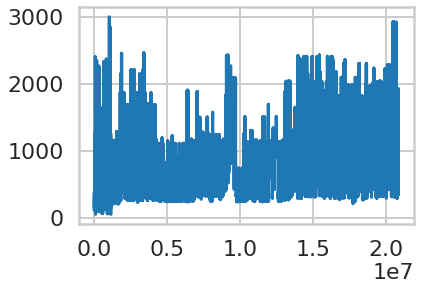

In [224]:
submission['yield'].plot()

In [225]:
#Converting the Dataframe to a csv file.

In [226]:
submission.to_csv('/home/3679b81a/predict_submission.csv', index = None)